**Содержание темы**

1. Теория
2. [Практический ноутбук 1](https://colab.research.google.com/drive/1LntFNrBcr_uoqv7XXuPP214iUqW76j24?usp=sharing)

На предыдущих уроках мы изучили основы Q-learning. Один из важных моментов в этом направлении — «Преимущество в нейронных сетях». Это метрика, которая позволяет НС лучше обучаться и сообщает ей, насколько то или иное действие лучше других.

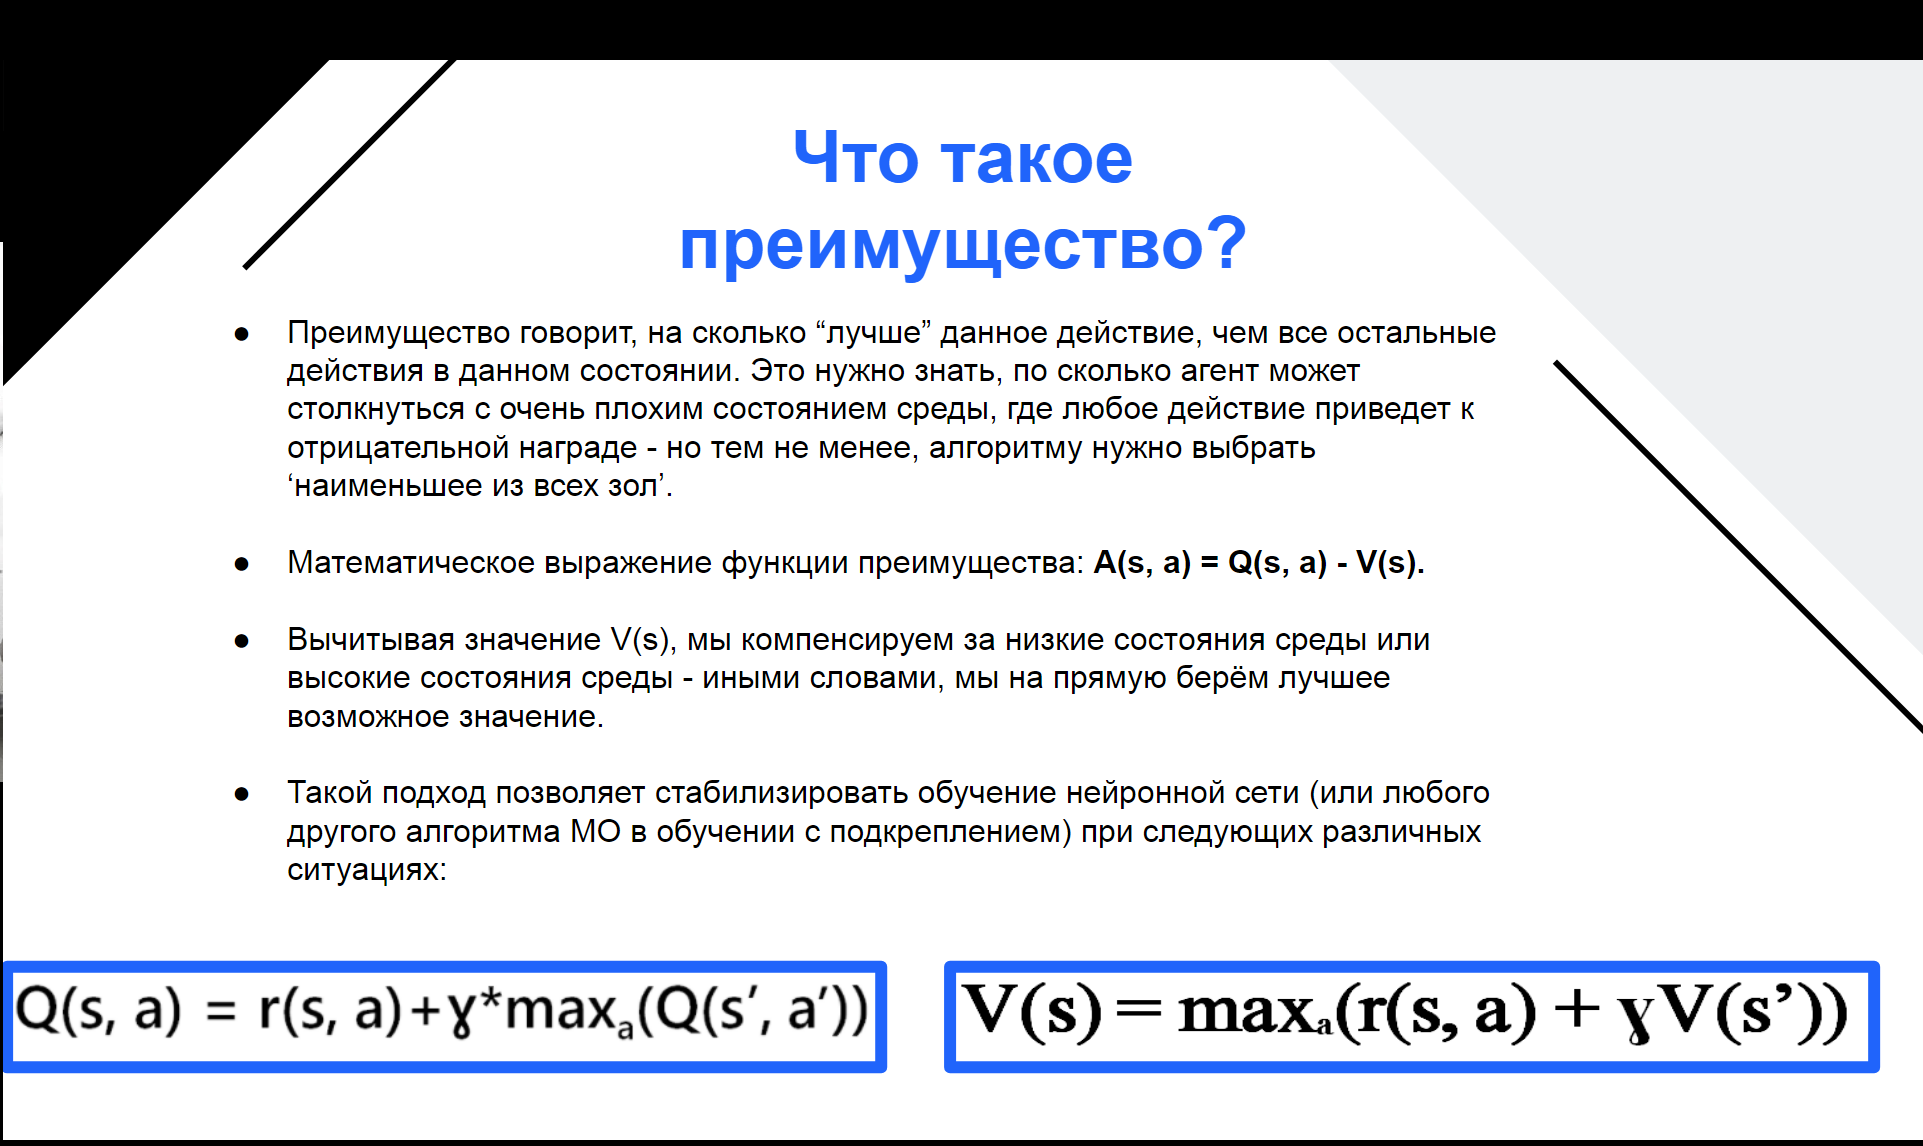

## Теория  

Преимущество указывает, какое действие лучше в той или иной ситуации. Даже когда надо выбрать меньшее зло в ситуации, когда любое действие приводит к отрицательному результату.

Формула, описывающая функцию преимущества, на слайде выше, где Q — насколько хорошее действие, V — значение состояния среды. Функции расчета можно увидеть внизу слайда.

Вычитая значение V, получаем лучшее возможное действие. Такой подход позволяет получить лучший результат вне зависимости от состояния среды, что обеспечивает стабильное обучение НС на всем промежутке времени.



Рассмотрим ситуации с низким и высоким значениями значением состояния:

1. Пример низкого значения состояния агента — белка из мультфильма «Ледниковый период», у которой все попытки расколоть орех лишь усугубляли ситуацию. 

Если в такой ситуации применить действие А, получаем отрицательную награду. Действие Б становится более логичным для использования НС. Но при применении действия Б тоже получаем отрицательный результат. НС попадает на качели выбора, где оба результата плохие.

В этом случае, если не использовать «Преимущество», оба действия получат награду -1, так как не учитывается среда, в которой действия происходят. Если же в расчет добавить состояние среды, можно увидеть, что при ударе ореха об дерево — ломается дерево, а при ударе об камень — на орехе образуется маленькая трещина. В обоих случаях орех целый, но второе действие принесло немного больше пользы, чем первое.

2. Рассмотрим и обратную ситуацию, когда она настолько хороша, что почти идеальна. 

Например, нападение немцев в 41 году. Другие страны слабее, не ожидают нападения. В условном состоянии, что бы не делали немцы, награда за действие — положительная. При первом раунде нападение на Польшу дает положительную награду. Возможно, нападение на другие страны дало бы большую награду, но НС в первом раунде об этом не знает. НС теперь знает, что это действие приносит положительную награду и увеличивает ее вероятность в выборе во втором раунде. И так до тех пор, пока вероятность этого действия не станет 100%. В данном случае НС попадает в ловушку, так как другие действия могли принести большую награду и быть лучше.

Использование преимущества дало бы НС информацию обо всех действиях и выбор был бы не первым действием, которое принесло положительную награду, а действием, приносящим максимально возможную награду. 

## Практические преимущества в архитектуре Dueling Deep Q-Network

В теории это хорошо звучит, но как применить эти знания на практике? Достаточно изменить архитектуру НС, чтобы получить дуэльную глубокую Q-сеть.

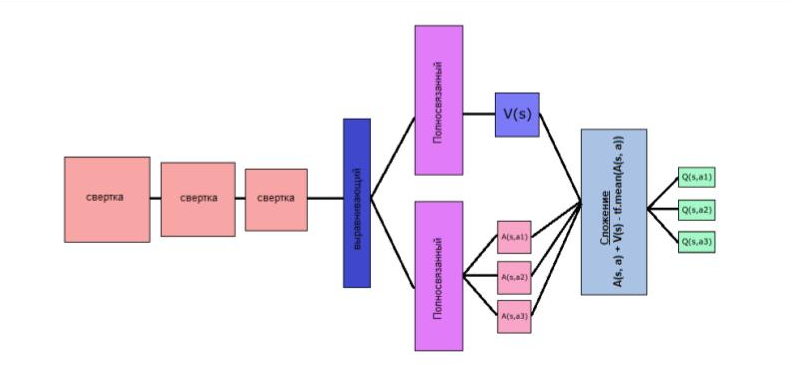

Изменения небольшие, но важные:

В начале, как и у любой НС, работающей с изображением, идет каскад свёрток и затем выравнивающий слой. Это необязательное условие, если необходимо обрабатывать не изображения, а сразу числа. Тогда может быть каскад из полносвязных слоев без выравнивающего слоя.

Теперь начинаются различия. Если обычно используем один поток значений и слои идут друг за другом, то в данном случае НС делится на два потока и два полносвязных слоя. Это необходимо для того, чтобы посчитать разные значения в дальнейшем.

Поток значений рассчитывает значение среды и имеет один нейрон. Поток преимуществ рассчитывает значения преимуществ и будет иметь столько нейронов, сколько есть действий.

>Данные полносвязные слои не запрещается объединять в один, но условия по выходным данным должны сохраняться.

Дальше идет нестандартный слой, который необходимо самостоятельно написать на Keras. В его задачи входит не только сложение полученных значений преимущества и состояния среды, но также вычитание среднего значения преимуществ. Это необходимо для распределения преимуществ между собой: половина станут положительными, половина — отрицательными.

Последний слой, который мы рассмотрели, и есть выходной слой, выдающий вероятность использования каждого действия.

Одно из главных достоинств дуэльной НС в том, что она может определять, когда состояния среды не важны и любое действие не имеет преимущества. На слайде можно увидеть два примера:
* Машинка должна уворачиваться от других машинок. Бывают моменты, когда машинок нет и любое действие не имеет значения для обучения.
* Пинг-понг: шарик иногда попадает за блоки, и обычная НС может думать, что если двигать ракетку, что-то изменится, так как блоки разрушаются. При этом дуэльная НС понимает, что любое движение ракеткой не имеет значения.

Теперь, когда мы разобрались с дуэльной НС, можно изучить ошибку Хубера.

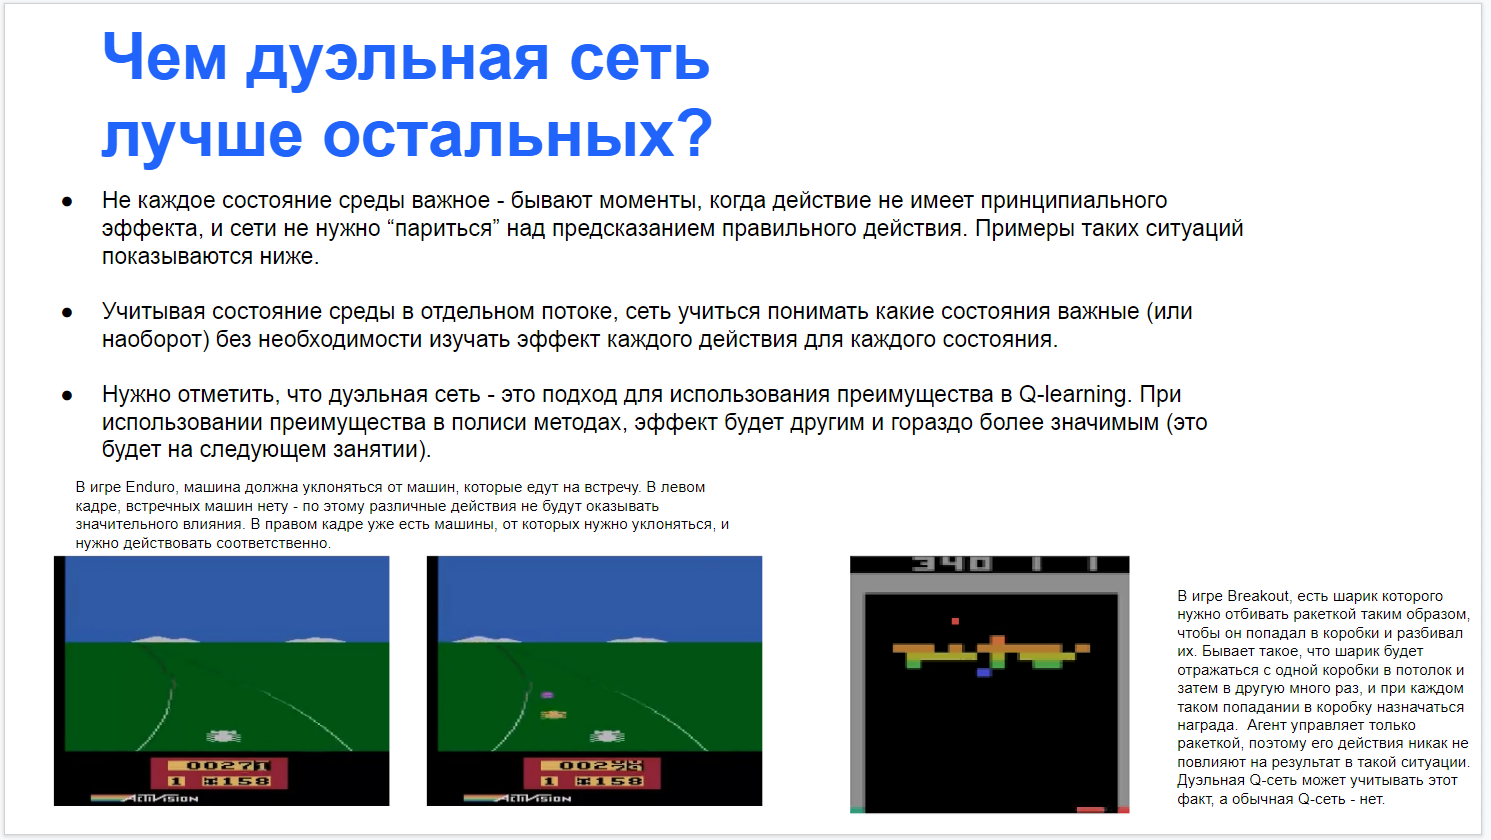

## Ошибка Хубера

Затронем новую функцию ошибки — ошибки Хубера, которую можно использовать в задачах регрессии.

Кроме Q-обучения используется также в тех НС, где стоит задача регрессии. Прежде чем изучить ошибку Хубера, рассмотрим плюсы и минусы ее основных конкурентов MAE и MSE:
* MAE — стабильна при больших значениях ошибки, но из-за того, что градиент не плавный, сложнее подобрать оптимальные значения весов.
* MSE — из-за маленького градиента при маленьком значении ошибки позволяет качественно настроить веса, но при больших значениях ошибки возможен градиентный взрыв, когда значение ошибки не уменьшается, а увеличивается.

Ошибка Хубера — это лучшее от обеих систем. При больших значениях ошибки ведет себя как MAE, а при маленьких — как MSE.

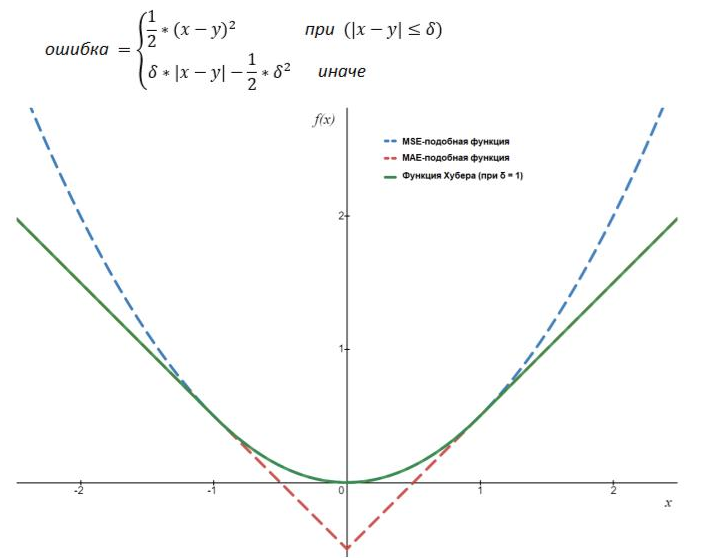

Формула ошибки Хубера и график указаны на слайде. Основное в данной ошибке — это гиперпараметр дельта. Этот параметр делит поведение ошибки на две части:
* |x| > d — как MAE;
* |x| < d — как MSE.

В условиях, когда награда за действия большая, есть смысл увеличить параметр дельта. Это добавляет еще один инструмент для получения хороших весов.



## Приоритизированный буфер памяти

Улучшенный алгоритм для буфера памяти, который использует не случайные примеры из памяти, а важные и полезные, что улучшит качество обучения.

В предыдущих уроках мы уже рассматривали буфер памяти как инструмент, помогающий избежать переобучения НС. Однако примеры для обучения извлекаются из буфера случайным образом. Хотя некоторые действия в игре могут иметь большее значение, чем другие, и их необходимо демонстрировать НС чаще, чем бесполезные или почти бесполезные действия.

В этом помогает приоритизированный буфер памяти и чаще других используемое — приоритизированное воспроизведение памяти.

Приоритизированное воспроизведение памяти — это отдельный алгоритм, который сортирует все примеры по их пользе.

Основной смысл этого алгоритма в том, что сравниваются два предсказания сети и на основе этой абсолютной разницы определяется, полезнее ли один набор примеров по сравнению с предыдущим. Чем больше разница между предсказаниями, тем более полезным считается набор данных. Значит нужно записать его в буфер памяти так, чтобы он чаще извлекался из памяти.

Но стоит помнить, что буфер может быть очень большим, например 50 000 примеров, из-за чего его необходимо сортировать после каждого шага НС. Это требует огромных вычислительных ресурсов и времени.

Для решения этой проблемы используем особую архитектуру базы данных — дерево сумм.

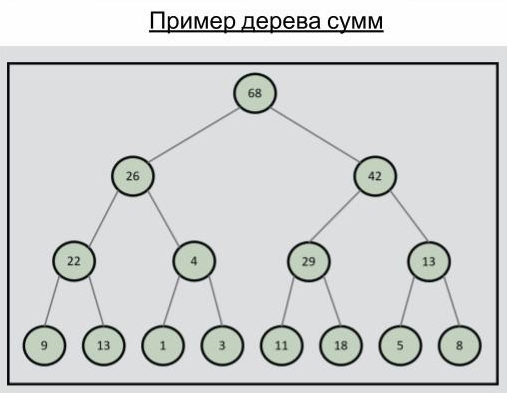

Дерево сумм — бинарное дерево, у которого каждая ячейка равна сумме дочерних ячеек. Все полезные значения, данные из буфера памяти хранятся в нижнем ряду. Остальные ряды необходимы только для того, чтобы быстро и эффективно находить необходимые данные.

>Количество ячеек в таком дереве равно 2*размер буфера памяти−1. То есть, если размер памяти буфера 32, то в дереве будет 63 ячейки.

Этот алгоритм не всегда полезен, так как зависит от сложности задачи. Если она простая, как например Lunar Lander из GymAI, то вреда алгоритм не принесет, просто НС будет дольше обучаться. Но если задача более сложная, то эффект может превзойти ожидания. Поэтому данный алгоритм лучше использовать, чем нет.

Рассмотрим, как происходит поиск необходимых данных в дереве.

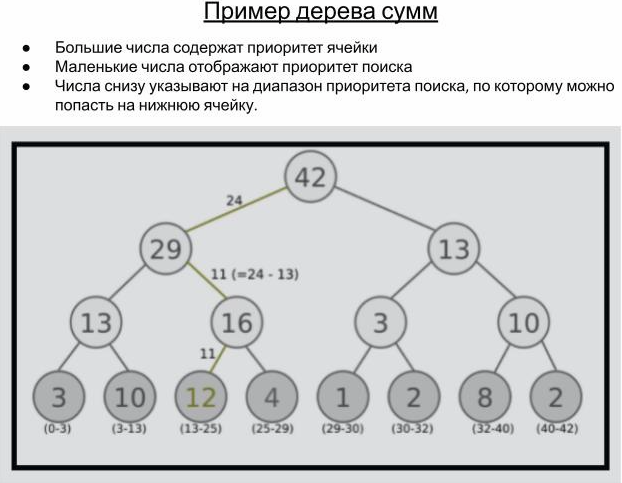

Для начала введем новое понятие — **значение поиска**. Это данные, которые необходимы для обучения НС. 

Рассмотрим пример: 
1. Пусть значение поиска равно 24, сравниваем со значениями ячеек. Если значение ячейки больше или равно значению поиска, то выбираем его. 29 больше 24, соответственно, двигаемся по этой ветке.
2. Теперь снова сравниваем ячейки: 13 не больше 24, но и 16 не больше 24. В данной ситуации выбираем ветвь, которая ближе к значению поиска. Но теперь алгоритм немного меняется, и из значения поиска нужно вычесть значение ячейки, которую не использовали, т. е. 24-13=11.
3. Спускаемся ниже и видим, что к условию больше или равно подходит только ячейка с значением 12.
4. Таким образом выбираются необходимые данные, что значительно ускоряет их перебор.

На этом теория окончена, перейдем к практике.

**Содержание темы**

1. Теория
2. [Практический ноутбук 1](https://colab.research.google.com/drive/1LntFNrBcr_uoqv7XXuPP214iUqW76j24?usp=sharing)